In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

import csv
import folium
import matplotlib.pyplot as plt
plt.rc('font',family='D2CodingLigature Nerd Font')

In [2]:
# 인구 데이터 읽어와서 리스트로 저장하기

f1 = open('../../data/LOCAL_PEOPLE_DONG_202510.csv', encoding='utf8')    
data = csv.reader(f1)
next(data)
data = list(data)

# 행정동코드 데이터 불러와서 리스트로 저장하기
f2 = open('../../data/dong_code.csv')
code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)

In [3]:
print(data[0]) 
print(code_data[0])

['20251001', '00', '11110515', '14561.0577', '588.3189', '374.8785', '459.9435', '387.2249', '431.7462', '432.571', '458.5653', '489.3383', '661.5676', '555.6315', '482.4606', '378.0271', '215.7855', '599.4907', '696.5016', '417.3243', '474.932', '323.8609', '376.0797', '458.6009', '644.8304', '703.2934', '750.6172', '692.1842', '607.2663', '504.9111', '362.0048', '1033.1016', '']
['1101053', '11110530', '서울', '종로구', '사직동']


In [4]:
# 인구데이터의 데이터타입 변경하기 
for row in data : 
    for i in range(1, 32) : 
        if i <= 2 : 
            row[i] = int(row[i])
        else : 
            row[i] = float(row[i])
            
# 행정동코드 데이터의 데이터 타입 변환하기
for row in code_data :
    row[1] = int(row[1]) # 8자리 행정동코드

In [5]:
print(data[0]) 
print(code_data[0])

['20251001', 0, 11110515, 14561.0577, 588.3189, 374.8785, 459.9435, 387.2249, 431.7462, 432.571, 458.5653, 489.3383, 661.5676, 555.6315, 482.4606, 378.0271, 215.7855, 599.4907, 696.5016, 417.3243, 474.932, 323.8609, 376.0797, 458.6009, 644.8304, 703.2934, 750.6172, 692.1842, 607.2663, 504.9111, 362.0048, 1033.1016, '']
['1101053', 11110530, '서울', '종로구', '사직동']


In [6]:
# 행정동 입력
dong_name1 = input('행정동을 입력하세요 --> ')
for row in code_data: 
    if row[-1] == dong_name1: 
        dong_code = int(row[1])

print(f"{dong_name1}, {dong_code}")

구로3동, 11530540


In [7]:
import datetime    

### 요일 : 0-월, 1-화,...., 6-일

weekd=[0 for i in range(24)]    # 주중
weeke=[0 for i in range(24)]    # 주말

for row in data:
    if row[2]==dong_code:
        time, p = row[1], row[3]
        year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:8])
        num= datetime.date(year,mon,day).weekday()
        if num<5:
            weekd[time]+=p
        else:
            weeke[time]+=p

In [8]:
print(weekd) 
print(weeke)

[636182.0825, 628538.3041, 624324.3145, 621010.3941, 623041.5576000001, 631198.2747999999, 643391.771, 777113.4132999999, 1087438.0043, 1241195.5409, 1293856.7503000002, 1326955.8093, 1347225.8203000003, 1348767.0455, 1336382.7344, 1309072.831, 1275012.2451, 1190165.3938999998, 996165.5330999999, 870634.6842000001, 805524.3842999999, 760473.7121000001, 723924.079, 659126.2962]
[222423.26180000004, 219629.2463, 217387.4493, 215432.4399, 212886.5177, 212717.62570000003, 210192.2831, 211303.01140000002, 215959.1267, 221240.106, 228211.78939999998, 233368.87600000002, 235405.41529999996, 237461.94280000002, 236463.19890000002, 234646.72629999998, 234274.50679999997, 233166.1488, 231771.4512, 229009.7269, 227611.3342, 230442.46509999997, 228237.6069, 218558.6755]


In [9]:
## 주중과 주말 일 수 구하기

weekd_cnt, weeke_cnt = 0,0

for i in range(1,32):
    if datetime.date(2025,10,i).weekday() < 5:
        weekd_cnt+=1
    else:
        weeke_cnt+=1
        
print('2025 10월의 주중 일 수 = ', weekd_cnt,'   주말 일 수 = ', weeke_cnt)

2025 10월의 주중 일 수 =  23    주말 일 수 =  8


In [10]:
weekd=[wd/weekd_cnt    for wd in weekd]
weeke=[we/weeke_cnt    for we in weeke]

print(f"시간대별 평균 주중 인구 : , {weekd}")
print(f"시간대별 평균 주말 인구 : , {weeke}")

시간대별 평균 주중 인구 : , [27660.09054347826, 27327.75235217391, 27144.53541304348, 27000.451917391307, 27088.763373913047, 27443.40325217391, 27973.55526086956, 33787.53970869565, 47279.91323043478, 53965.0235173913, 56254.64131739131, 57693.73083913044, 58575.0356652174, 58642.04545652174, 58103.59714782608, 56916.21004347826, 55435.31500434782, 51746.321473913034, 43311.5449173913, 37853.68192173914, 35022.7993173913, 33064.07443913044, 31474.95995652174, 28657.665052173914]
시간대별 평균 주말 인구 : , [27802.907725000005, 27453.6557875, 27173.4311625, 26929.0549875, 26610.8147125, 26589.703212500004, 26274.0353875, 26412.876425000002, 26994.8908375, 27655.01325, 28526.473674999997, 29171.109500000002, 29425.676912499996, 29682.742850000002, 29557.899862500002, 29330.840787499998, 29284.313349999997, 29145.7686, 28971.4314, 28626.2158625, 28451.416775, 28805.308137499997, 28529.7008625, 27319.8344375]


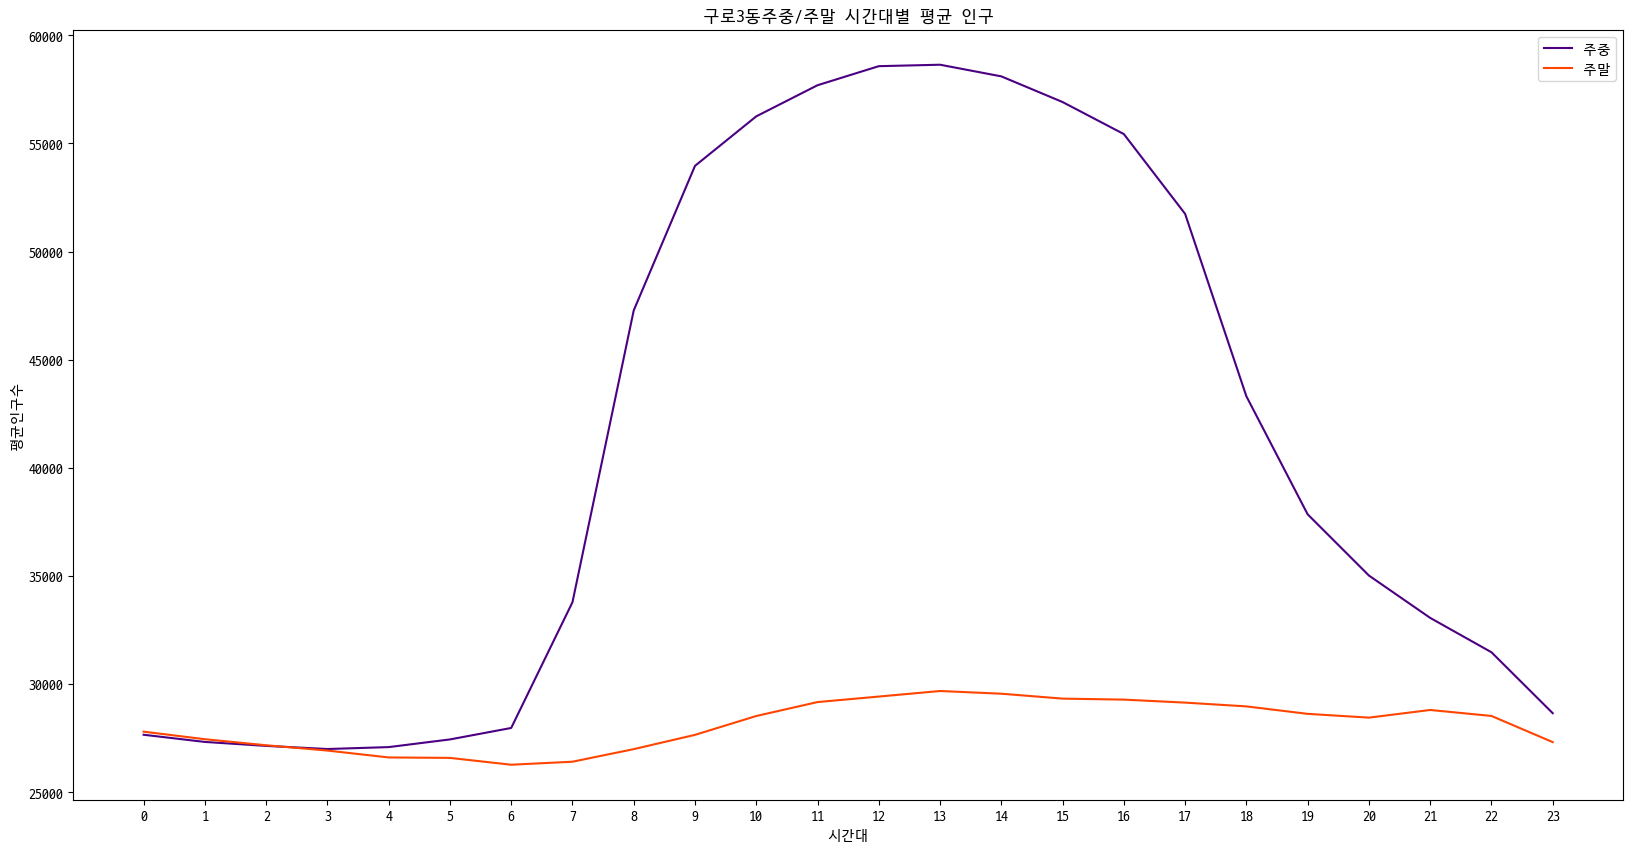

In [11]:
plt.figure(figsize=(20,10))
plt.title(dong_name1 + '주중/주말 시간대별 평균 인구')
plt.plot(range(24),weekd, color='indigo', label='주중')
plt.plot(range(24),weeke, color='orangered', label='주말')
plt.legend()
plt.xticks(range(24))
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()